In [1]:
import pandas as pd
import numpy as np
import matplotlib

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
airline = pd.read_excel('Airlines+Data.xlsx',index_col='Month',parse_dates=True)

In [4]:
airline.dropna(inplace=True)

In [5]:
airline.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


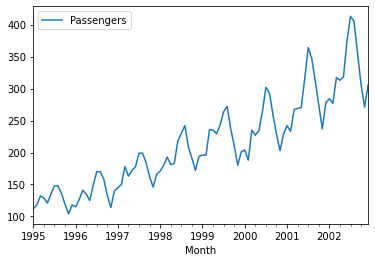

In [6]:
airline.plot();

## ETS_Decomposition

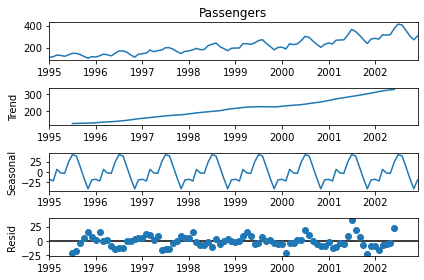

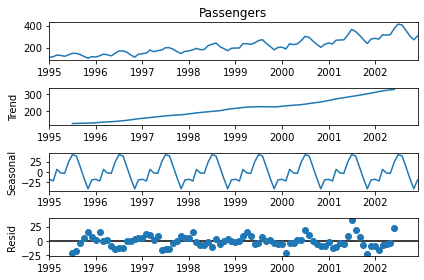

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(airline['Passengers'])  
result.plot()

<AxesSubplot:xlabel='Month'>

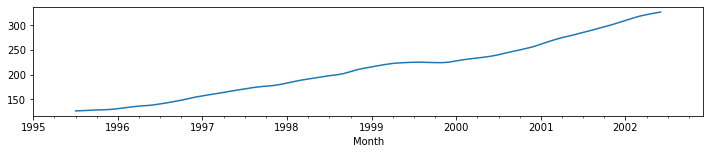

In [8]:
result.trend.plot(figsize=(12,2))

<AxesSubplot:xlabel='Month'>

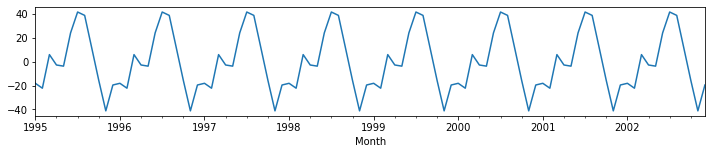

In [9]:
result.seasonal.plot(figsize=(12,2))

<AxesSubplot:xlabel='Month'>

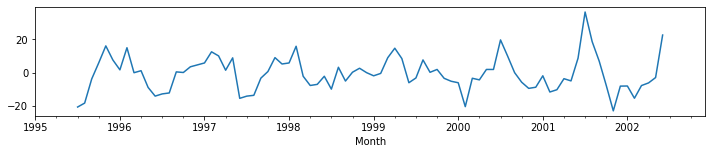

In [10]:
result.resid.plot(figsize=(12,2))

In [11]:
airline.index.freq = 'MS'
airline.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01', '1995-11-01', '1995-12-01',
               '1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01',
               '1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               '1998-05-01', '1998-06-01', '1998-07-01', '1998-08-01',
               '1998-09-01', '1998-10-01', '1998-11-01', '1998-12-01',
               '1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
      

## Simple Exponential Smoothing

In [12]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [13]:
alpha = 0.5
model_ses12=SimpleExpSmoothing(airline['Passengers'])
fitted_model= model_ses12.fit(smoothing_level=alpha,optimized=False)
airline['SES12'] = fitted_model.fittedvalues.shift(-1)
airline.head()

,Passengers,SES12
Month,,
1995-01-01,112,112.000
1995-02-01,118,115.000
1995-03-01,132,123.500
1995-04-01,129,126.250
1995-05-01,121,123.625


## Double Exponential Smoothing

In [14]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

mod_add12 = ExponentialSmoothing(airline['Passengers'], trend='add')
fitted_model= mod_add12.fit()
airline['DESadd12'] = fitted_model.fittedvalues.shift(-1)
airline.head()

,Passengers,SES12,DESadd12
Month,,,
1995-01-01,112,112.000,114.0447
1995-02-01,118,115.000,120.0447
1995-03-01,132,123.500,134.0447
1995-04-01,129,126.250,131.0447
1995-05-01,121,123.625,123.0447


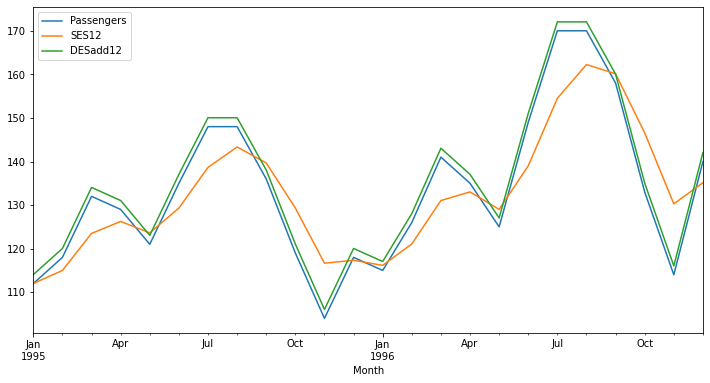

In [15]:
airline[['Passengers','SES12','DESadd12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True)

In [16]:
airline['DESmul12'] = ExponentialSmoothing(airline['Passengers'], trend='mul').fit().fittedvalues.shift(-1)
airline.head()

,Passengers,SES12,DESadd12,DESmul12
Month,,,,
1995-01-01,112,112.000,114.0447,112.359290
1995-02-01,118,115.000,120.0447,118.376690
1995-03-01,132,123.500,134.0447,132.419280
1995-04-01,129,126.250,131.0447,129.415863
1995-05-01,121,123.625,123.0447,121.391692


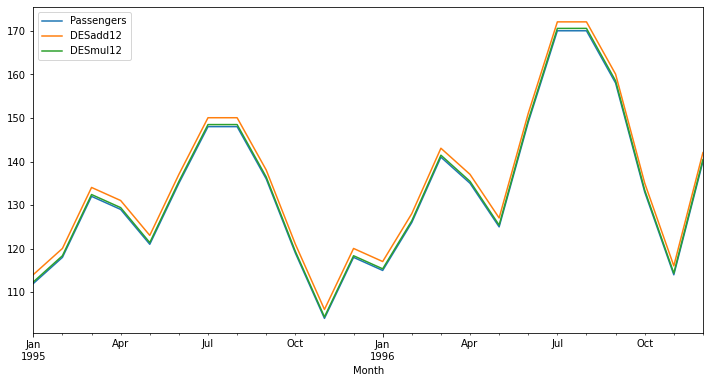

In [17]:
airline[['Passengers','DESadd12','DESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True)

## Triple Exponential Smoothing

In [18]:
airline['TESadd12'] = ExponentialSmoothing(airline['Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
airline.head()

,Passengers,SES12,DESadd12,DESmul12,TESadd12
Month,,,,,
1995-01-01,112,112.000,114.0447,112.359290,111.998411
1995-02-01,118,115.000,120.0447,118.376690,119.931315
1995-03-01,132,123.500,134.0447,132.419280,134.246702
1995-04-01,129,126.250,131.0447,129.415863,130.734164
1995-05-01,121,123.625,123.0447,121.391692,123.860175


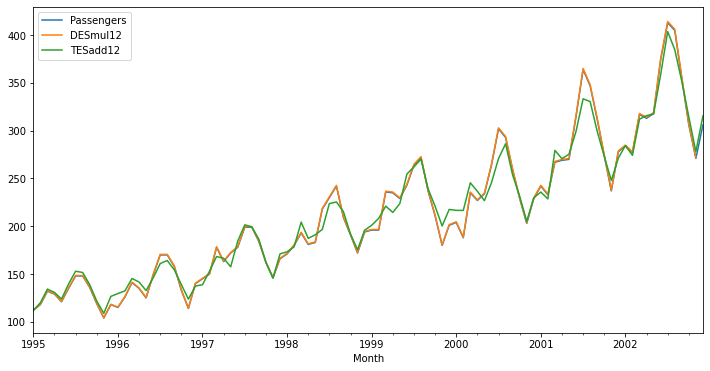

In [19]:
airline[['Passengers','DESmul12','TESadd12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True)

In [20]:
airline['TESmul12'] = ExponentialSmoothing(airline['Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
airline.head()

,Passengers,SES12,DESadd12,DESmul12,TESadd12,TESmul12
Month,,,,,,
1995-01-01,112,112.000,114.0447,112.359290,111.998411,113.645946
1995-02-01,118,115.000,120.0447,118.376690,119.931315,111.327516
1995-03-01,132,123.500,134.0447,132.419280,134.246702,134.355786
1995-04-01,129,126.250,131.0447,129.415863,130.734164,129.668603
1995-05-01,121,123.625,123.0447,121.391692,123.860175,129.739658


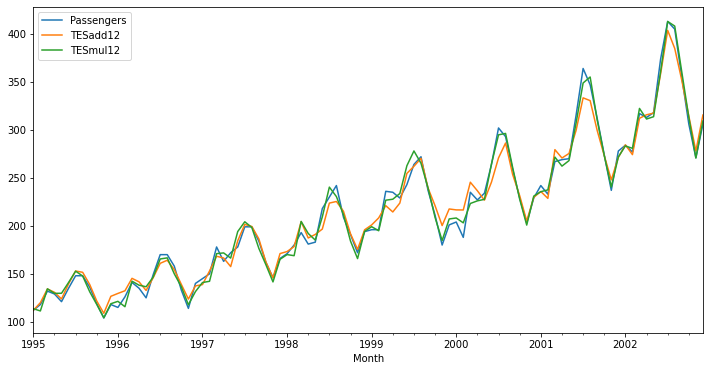

In [21]:
airline[['Passengers','TESadd12','TESmul12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True)

## Model Evaluation

In [24]:
airline['rmse_ses12'] = np.sqrt(np.mean((airline['Passengers']-airline['SES12'])**2))

In [25]:
rmse_ses12

14.062091609782028

In [27]:
airline['rmse_DESadd12'] = np.sqrt(np.mean((airline['Passengers']-airline['DESadd12'])**2))

In [28]:
airline['rmse_DESmul12'] = np.sqrt(np.mean((airline['Passengers']-airline['DESmul12'])**2))

In [29]:
airline['rmse_TESadd12'] = np.sqrt(np.mean((airline['Passengers']-airline['TESadd12'])**2))

In [30]:
airline['rmse_TESmul12'] = np.sqrt(np.mean((airline['Passengers']-airline['TESmul12'])**2))

In [31]:
airline.head()

,Passengers,SES12,DESadd12,DESmul12,TESadd12,TESmul12,rmse_DESadd12,rmse_DESmul12,rmse_TESadd12,rmse_TESmul12
Month,,,,,,,,,,
1995-01-01,112,112.000,114.0447,112.359290,111.998411,113.645946,2.0447,0.727722,10.086732,6.733559
1995-02-01,118,115.000,120.0447,118.376690,119.931315,111.327516,2.0447,0.727722,10.086732,6.733559
1995-03-01,132,123.500,134.0447,132.419280,134.246702,134.355786,2.0447,0.727722,10.086732,6.733559
1995-04-01,129,126.250,131.0447,129.415863,130.734164,129.668603,2.0447,0.727722,10.086732,6.733559
1995-05-01,121,123.625,123.0447,121.391692,123.860175,129.739658,2.0447,0.727722,10.086732,6.733559
